<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd, numpy as np
from datetime import datetime, date
from matplotlib import pyplot as plt
import seaborn as sns
import io

In [145]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II (3).xlsx


In [146]:
df = pd.read_excel(io.BytesIO(uploaded.get('online_retail_II.xlsx'))) #reading the excel file#

In [147]:
print('The dataset has orders made from {} to {}'.format(min(df['InvoiceDate']),
                                                         max(df['InvoiceDate'])))

The dataset has orders made from 2020-12-01 07:45:00 to 2021-12-09 20:01:00


In [148]:
df[['Quantity', 'Price']].describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


**ad-hoc data cleaning**

In [149]:
df[df.Description=='OOPS ! adjustment']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand


In [150]:
df = df[
    (df.Quantity > 0) &
    (df.Price > 0)
]

In [151]:
df.groupby('StockCode').Description.nunique().sort_values(ascending=False)

StockCode
22346    4
21955    4
22384    4
20685    4
22344    4
        ..
22402    1
22403    1
22407    1
22411    1
m        1
Name: Description, Length: 4251, dtype: int64

In [152]:
df[df.StockCode=='17107D'].Description.drop_duplicates()

10248    FLOWER FAIRY,5 SUMMER B'DRAW LINERS
Name: Description, dtype: object

In [153]:
df = df[~df.StockCode.isin(['POST', 'DOT', 'M', 'AMAZONFEE', 'BANK CHARGES', 'C2', 'S'])]

In [154]:
len(df)

509364

**Quick visualization for plausibility checks**

In [155]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df['Date'] = pd.to_datetime(df.InvoiceDate.dt.date)
df['revenue'] = df.Quantity * df.Price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [157]:
df.set_index(['Date', 'StockCode', 'Country']).sample(10)

,,,Invoice,Description,Quantity,InvoiceDate,Price,CustomerID,Brand,revenue
Date,StockCode,Country,,,,,,,,
2021-01-25,22367,United Kingdom,495504,CHILDS APRON SPACEBOY DESIGN,5,2021-01-25 13:14:00,1.95,16795.0,0,9.75
2021-04-15,22326,Germany,504697,ROUND SNACK BOXES SET OF4 WOODLAND,6,2021-04-15 17:18:00,2.95,12474.0,0,17.70
2021-01-12,21775,United Kingdom,494166,DECORATIVE FLORE BATHROOM BOTTLE,1,2021-01-12 09:47:00,2.51,NaN,0,2.51
2021-09-26,47021G,United Kingdom,523960,SET/6 BEAD COASTERS GAUZE BAG GOLD,2,2021-09-26 12:51:00,1.25,16340.0,0,2.50
2021-04-14,21897,United Kingdom,504550,POTTING SHED CANDLE CITRONELLA,6,2021-04-14 12:56:00,2.95,17039.0,5,17.70
2021-11-29,22737,United Kingdom,535827,RIBBON REEL CHRISTMAS PRESENT,10,2021-11-29 09:22:00,1.65,16235.0,0,16.50
2020-12-17,85123A,United Kingdom,492593,WHITE HANGING HEART T-LIGHT HOLDER,3,2020-12-17 15:44:00,2.95,15917.0,0,8.85
2021-10-28,17007B,United Kingdom,529587,S/3 POT POURI CUSHIONS BLUE COLOURS,2,2021-10-28 19:51:00,2.10,13780.0,0,4.20
2021-01-18,47592B,United Kingdom,494779,SCOTTIES DESIGN CHILD'S OVERALL,5,2021-01-18 12:55:00,2.10,18041.0,0,10.50


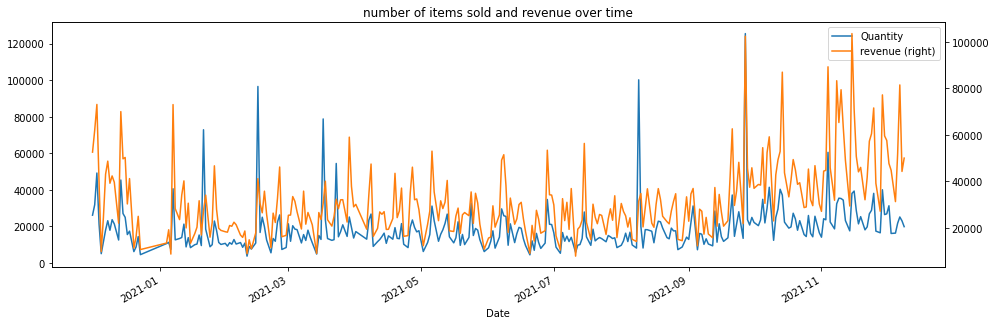

In [158]:
df.groupby('Date').agg(
    {'Quantity': 'sum', 'revenue': 'sum'}
).plot(
    title='number of items sold and revenue over time', 
    secondary_y='revenue',
    figsize=(16, 5)
)

In [159]:
df.nlargest(5, columns='Quantity')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Brand,Date,revenue
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2021-02-15 11:57:00,0.1,13902.0,Denmark,0,2021-02-15,1915.2
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2021-03-17 13:09:00,0.1,13902.0,Denmark,0,2021-03-17,1296.0
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2021-03-17 13:09:00,0.1,13902.0,Denmark,0,2021-03-17,1296.0
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2021-03-17 13:09:00,0.1,13902.0,Denmark,1,2021-03-17,1274.4
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2021-03-17 13:09:00,0.1,13902.0,Denmark,3,2021-03-17,1248.0


In [160]:
df = df[~df.CustomerID.isin([16446.0, 12346.0])]

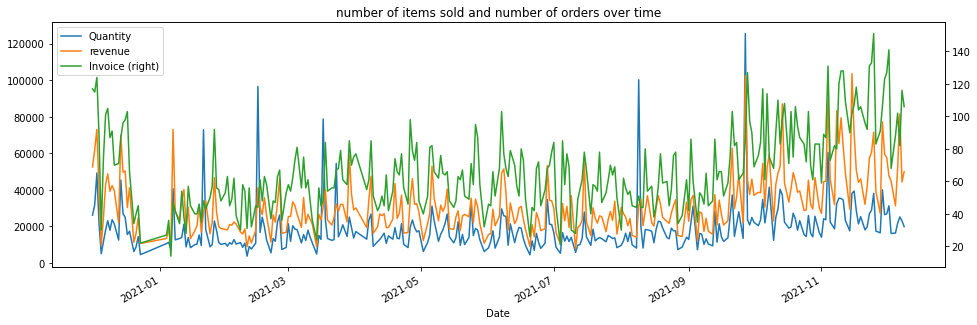

In [161]:
df.groupby('Date').agg(
    {'Quantity': 'sum', 'revenue': 'sum', 'Invoice': 'nunique'}
).plot(
    title='number of items sold and number of orders over time', 
    secondary_y='Invoice',
    figsize=(16, 5)
)

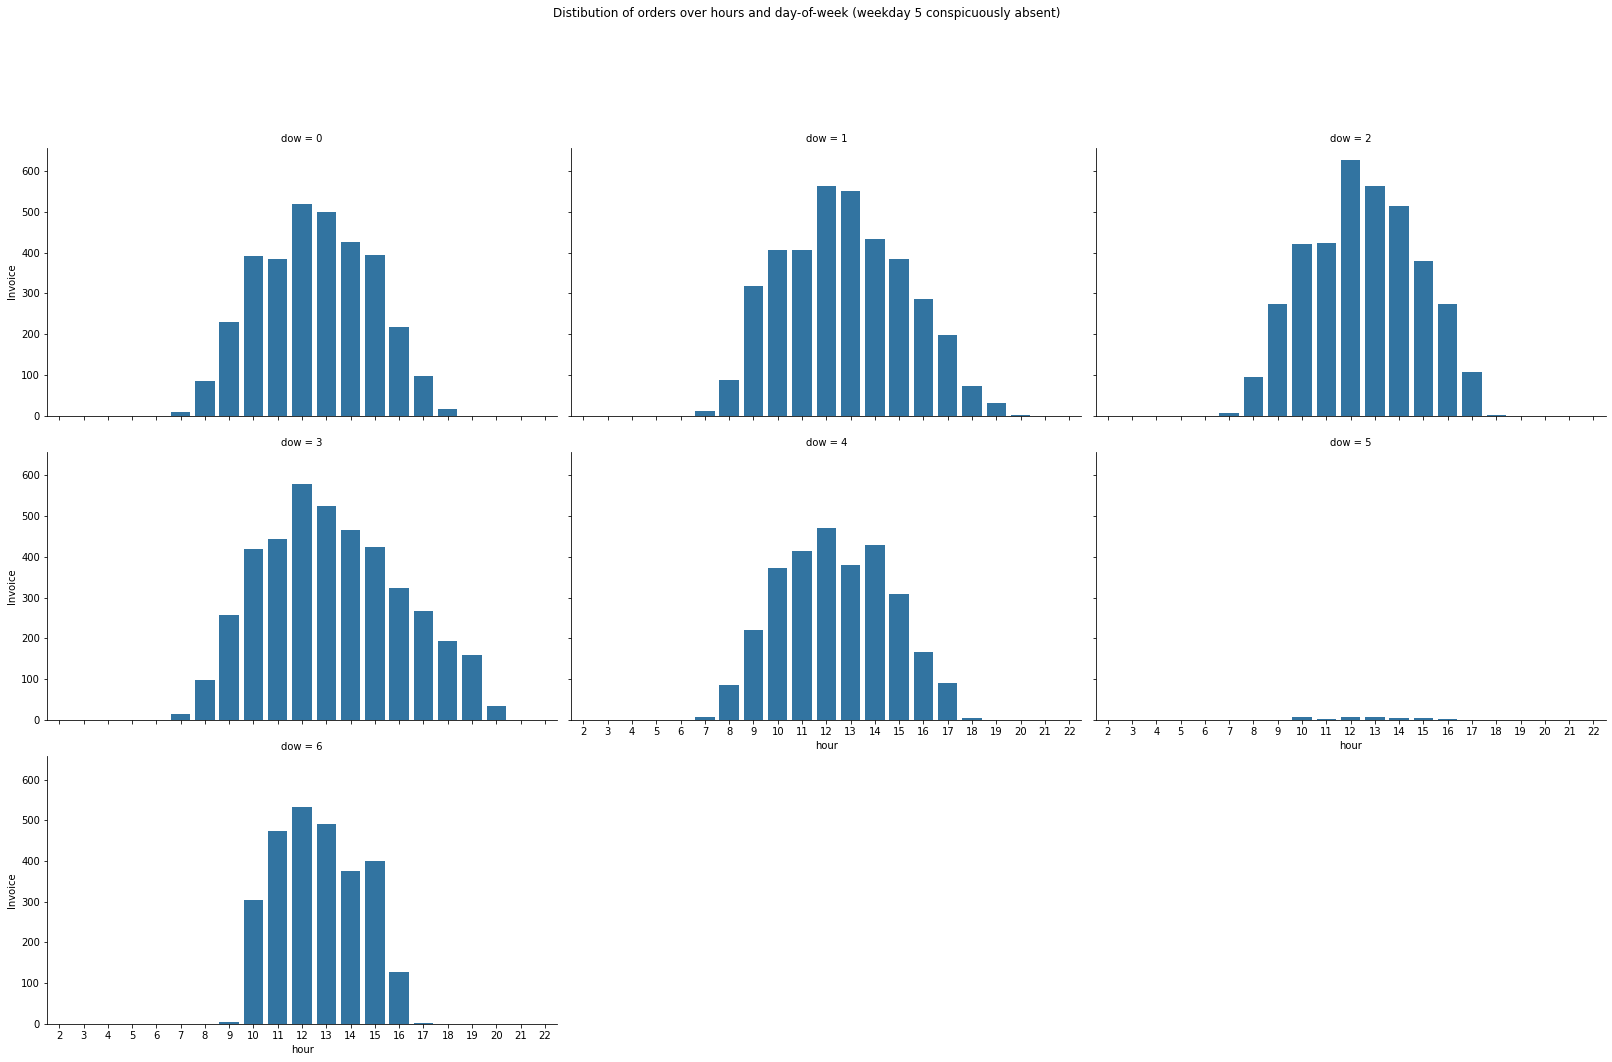

In [162]:
sns.FacetGrid(
    data=df.assign(
        hour=df.InvoiceDate.dt.hour,
        dow=df.InvoiceDate.dt.weekday,
    ).groupby(['dow', 'hour'], as_index=False).agg({'Invoice': 'nunique'}),
    col='dow', col_wrap=3,
    height=5, aspect=1.5, 
).map(
    sns.barplot, 'hour', 'Invoice', order=[h for h in range(2, 23)]
)
plt.suptitle('Distibution of orders over hours and day-of-week (weekday 5 conspicuously absent)')
plt.subplots_adjust(top=0.85)

**Final transformation**

To simplify the problem & speed up algos, we summarize the data to the relevant unit of observation: item (SKU) x date x country level (summing over individual orders, discarding "hour" information).

Before we do that, for some opinionated data cleaning, we'll do the following

censor observations with implausibly large price deviation - a few products have sales for 100x their normal price. That seems more likely to be a data error than anything else. If not removed, those outliers mess with later analysis

In [163]:
len(df)

509331

In [164]:
df = (
    df
    .assign(
        dNormalPrice=lambda d: d.Price 
            / d.groupby('StockCode').Price.transform('median') 
    )
    .pipe(
        lambda d: d[
            (d['dNormalPrice'] > 1./3) &
            (d['dNormalPrice'] < 3.)
        ]
    )
    .drop(columns=['dNormalPrice'])
)

In [165]:
len(df)

504951

In [166]:
df = df.groupby(['Date', 'StockCode', 'Country'], as_index=False).agg({
    'Description': 'first',
    'Quantity': 'sum', 
    'revenue': 'sum'
})
df['Description'] = df.groupby('StockCode').Description.transform('first')

df['Price'] = df['revenue'] / df['Quantity'] # implicit quantity-weighted avg of prices

In [167]:
len(df)

286545

**Variance of prices per product?**

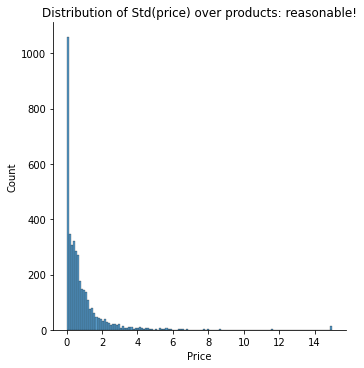

In [168]:
sns.displot(df.groupby('StockCode').Price.std().dropna().clip(0, 15), kde=False)
plt.title('Distribution of Std(price) over products: reasonable!');

In [169]:
len(df)

286545

In [170]:
df_mdl = df[
    (df.groupby('StockCode').Price.transform('std') > 0)
]
del df

In [171]:
len(df_mdl)

282392

**Price elasticity of demand**

In [172]:
df_mdl = df_mdl.assign(
    LnP = np.log(df_mdl['Price']),
    LnQ = np.log(df_mdl['Quantity']),
)

Naive analysis first

In [173]:
df_mdl[['LnP', 'LnQ']].cov()

,LnP,LnQ
LnP,0.845176,-0.546819
LnQ,-0.546819,1.853473


**Price elasticity of demand**

In [174]:
import statsmodels.api as sm # get full stats on regressions
import pandas.util.testing as tm
def binned_ols(df, x, y, n_bins, plot=True, plot_title='', plot_ax=None, **plt_kwargs):
    # A visual form of de-noising: bin explanatory variable first, 
    # then take means-per-bin of variable to be explaioned, then
    # regress/plot 
    x_bin = x + '_bin'
    df[x_bin] = pd.qcut(df[x], n_bins)

    tmp = df.groupby(x_bin).agg({
        x: 'mean',
        y: 'mean'
    })

    if plot:
        tmp.plot(
            x=x, 
            y=y,
            figsize=(18, 6),
            title=plot_title,
            ax=plot_ax,
            **plt_kwargs
        )
    
    del df[x_bin]
    mdl = sm.OLS(tmp[y], sm.add_constant(tmp[x]))
    res = mdl.fit()
    return res

"Naive" elasticity estimated to be -0.6851769825548689


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LnQ   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.07e-07
Time:                        08:26:47   Log-Likelihood:                 1.9410
No. Observations:                  15   AIC:                            0.1180
Df Residuals:                      13   BIC:                             1.534
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4494      0.079     30.821      0.000       2.278       2.621
LnP           -0.6852      0.066    -10.460      0.000      -0.827      -0.544
==============================================================================
Omnibus:                        5.222   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.776
Skew:                           1.020   Prob(JB):                        0.250
Kurtosis:                       3.525   Cond. No.                         2.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

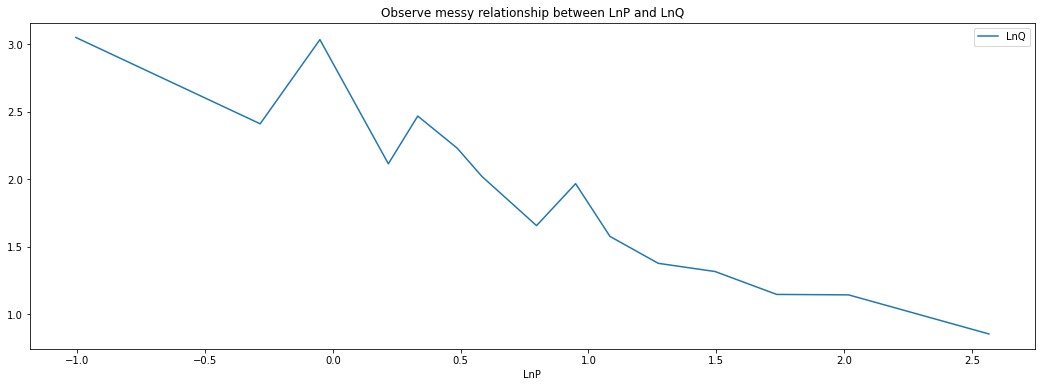

In [175]:
ols_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=15,
    plot_title='Observe messy relationship between LnP and LnQ'
)

print(f'"Naive" elasticity estimated to be {ols_fit.params["LnP"]}')
ols_fit.summary()

**Build standard econometrics-style causal model**

In [176]:
import sklearn.preprocessing

In [177]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_extraction.text import CountVectorizer

In [178]:
feature_generator_basic = ColumnTransformer(
    [
        ('StockCode', OneHotEncoder(), ['StockCode']),
        ('Date', OneHotEncoder(), ['Date']),
        ('Country', OneHotEncoder(), ['Country']),
        ('LnP', 'passthrough', ['LnP']),
    ], remainder='drop'
)

mdl_basic = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.PoissonRegressor(
        alpha=1e-6,  # l2 penalty strength; manually selected value for minimum interference on LnP-coef (elasticity)
        fit_intercept=False, # no need, since we have OneHot encodings without drop
        max_iter=100_000, 
    )),
], verbose=True)

mdl_basic_ols = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.Ridge(
        alpha=1e-20,  # l2 penalty strength, "very small"
        fit_intercept=False, 
        max_iter=100_000, 
    )),
], verbose=True)

In [179]:
df_mdl[['LnP', 'StockCode', 'Date', 'Country']] = df_mdl[['LnP', 'StockCode', 'Date', 'Country']].astype(str)

In [180]:
mdl_basic.fit(
    df_mdl[['LnP', 'StockCode', 'Date', 'Country']], 
    df_mdl['Quantity'] # Poisson regression has log-link, so LnQ is implicit in loss function
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing reg, total= 2.8min


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('StockCode', OneHotEncoder(),
                                                  ['StockCode']),
                                                 ('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
                ('reg',
                 PoissonRegressor(alpha=1e-06, fit_intercept=False,
                                  max_iter=100000))],
         verbose=True)

In [181]:
mdl_basic_ols.fit(
    df_mdl[['LnP', 'StockCode', 'Date', 'Country']], 
    df_mdl['LnQ'] # log-normal
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.4s
[Pipeline] ............... (step 2 of 2) Processing reg, total=   0.2s


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('StockCode', OneHotEncoder(),
                                                  ['StockCode']),
                                                 ('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
                ('reg',
                 Ridge(alpha=1e-20, fit_intercept=False, max_iter=100000))],
         verbose=True)

In [182]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):')
coef = pd.DataFrame({
    'feat': mdl_basic['feat_proc'].get_feature_names(),
    'coef': mdl_basic['reg'].coef_
})
coef.iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feat         LnP
coef   -4.401826
Name: 3940, dtype: object

In [183]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):')
pd.DataFrame({
    'feat': mdl_basic_ols['feat_proc'].get_feature_names(),
    'coef': mdl_basic_ols['reg'].coef_
}).iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feat         LnP
coef   -2.143928
Name: 3940, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


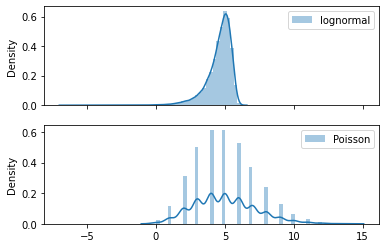

In [184]:
# The significant difference in estimates for log-normal vs. Poisson
# is explained by Poisson's fat tails: noisy/extreme values have a stronger
# effect in log-normal than in Poisson.
f, ax = plt.subplots(2, 1, sharex=True)
pos_normal = np.random.normal(loc=100, scale=100, size=12_000)
pos_normal = pos_normal[pos_normal > 0]
sns.distplot(np.log(pos_normal), label='lognormal', ax=ax[0])
sns.distplot(np.random.poisson(lam=5, size=10_000), label='Poisson', ax=ax[1])

ax[0].legend()
ax[1].legend()

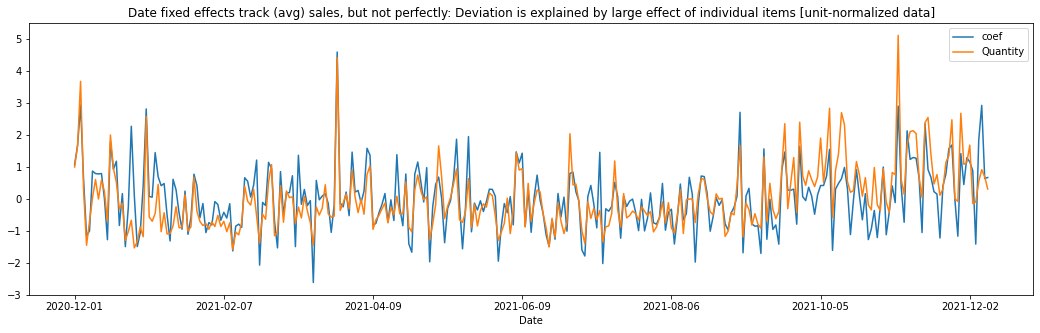

In [185]:
# For some intuition about this regression, convince ourselves that
# the time fixed effects do inded track quantity sold over time
# The divergence of q and time-coefs at the beginning and end likely 
# points towards new products that are introduced/old ones that are faded out
(
    pd.concat(
        [
            coef[coef.feat.str.startswith('Date')].reset_index(drop=True),
            df_mdl.groupby('Date').Quantity.sum().reset_index()
        ], 
        axis=1
    )
    .set_index(['Date'])
    .drop(columns=['feat'])
    .pipe(
        lambda d: (d - d.mean()) / d.std()
    )
).plot(
    figsize=(18, 5),
    title='Date fixed effects track (avg) sales, but not perfectly: Deviation is explained by large effect of individual items [unit-normalized data]'
)

**DML Tree by hand**

**Step 0: delta-log-scale & feature engineering**

In [186]:
# Note that de-meaning happens on StockCode-level here!
df_mdl['dLnP'] = np.log(df_mdl.Price) - np.log(df_mdl.groupby('StockCode').Price.transform('mean'))
df_mdl['dLnQ'] = np.log(df_mdl.Quantity) - np.log(df_mdl.groupby('StockCode').Quantity.transform('mean')) 

In [187]:
df_mdl[['dLnP', 'dLnQ']].cov()

,dLnP,dLnQ
dLnP,0.057582,-0.120257
dLnQ,-0.120257,1.282533


In [191]:
df_mdl.head()

,Date,StockCode,Country,Description,Quantity,revenue,Price,LnP,LnQ,dLnP,dLnQ
0,2020-12-01,10002,United Kingdom,INFLATABLE POLITICAL GLOBE,12,10.20,0.85,-0.16251892949777494,2.484907,-0.089891,-1.105658
1,2020-12-01,10120,United Kingdom,DOGGY RUBBER,60,12.60,0.21,-1.5606477482646683,4.094345,-0.188851,1.643750
2,2020-12-01,10125,United Kingdom,MINI FUNKY DESIGN TAPES,5,5.10,1.02,0.01980262729617973,1.609438,0.020225,-0.952009
3,2020-12-01,10133,United Kingdom,COLOURING PENCILS BROWN TUBE,6,5.10,0.85,-0.16251892949777494,1.791759,-0.108075,-0.700068
4,2020-12-01,10135,United Kingdom,COLOURING PENCILS BROWN TUBE,17,21.25,1.25,0.22314355131420976,2.833213,-0.103574,-0.009348


In [193]:
df_mdl['month'] = df_mdl['Date'].dt.month

In [194]:
df_mdl = df_mdl.assign(
    month = lambda d: d.Date.dt.month,
    DoM =   lambda d: d.Date.dt.day,
    DoW =   lambda d: d.Date.dt.weekday,
    stock_age_days = lambda d: 
        (d.Date - d.groupby('StockCode').Date.transform('min')).dt.days,
    sku_avg_p = lambda d: 
        d.groupby('StockCode').Price.transform('median')
)

In [203]:
df_mdl.head()

,Date,StockCode,Country,Description,Quantity,revenue,Price,LnP,LnQ,dLnP,dLnQ,month,DoM,DoW,stock_age_days,sku_avg_p
0,2020-12-01 00:00:00+00:00,10002,United Kingdom,INFLATABLE POLITICAL GLOBE,12,10.20,0.85,-0.16251892949777494,2.484907,-0.089891,-1.105658,12,1,1,0,0.85
1,2020-12-01 00:00:00+00:00,10120,United Kingdom,DOGGY RUBBER,60,12.60,0.21,-1.5606477482646683,4.094345,-0.188851,1.643750,12,1,1,0,0.21
2,2020-12-01 00:00:00+00:00,10125,United Kingdom,MINI FUNKY DESIGN TAPES,5,5.10,1.02,0.01980262729617973,1.609438,0.020225,-0.952009,12,1,1,0,0.85
3,2020-12-01 00:00:00+00:00,10133,United Kingdom,COLOURING PENCILS BROWN TUBE,6,5.10,0.85,-0.16251892949777494,1.791759,-0.108075,-0.700068,12,1,1,0,0.85
4,2020-12-01 00:00:00+00:00,10135,United Kingdom,COLOURING PENCILS BROWN TUBE,17,21.25,1.25,0.22314355131420976,2.833213,-0.103574,-0.009348,12,1,1,0,1.25


**Step 1: auxiliary models to orthogonalize T (price) and Y (quantity)**

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
feature_generator_full = ColumnTransformer(
    [
        # do NOT include to reduce overfit (price is sku-level-demeaned anyway): 
        # ('StockCode', OneHotEncoder(), ['StockCode']), 
        ('Date', OneHotEncoder(), ['Date']),
        ('Description', CountVectorizer(min_df=0.0025, ngram_range=(1, 3)), 'Description'),
        ('Country', OneHotEncoder(), ['Country']),
        ('numeric_feats', StandardScaler(), ['month', 'DoM', 'DoW', 'stock_age_days', 'sku_avg_p']),
    ], remainder='drop'
)

In [197]:
model_y = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_y', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0)) 
    # n_samples_leaf/n_estimators is set to reduce model (file) size and runtime
    # larger models yield prettier plots.
])
model_t = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_t', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0))
])

In [201]:
model_y

Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Description',
                                                  CountVectorizer(min_df=0.0025,
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'Description'),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('numeric_feats',
                                                  StandardScaler(),
                                                  ['month', 'DoM', 'DoW',
                                                   'stock_age_days',
                                    

In [202]:
model_t

Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('Date', OneHotEncoder(),
                                                  ['Date']),
                                                 ('Description',
                                                  CountVectorizer(min_df=0.0025,
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'Description'),
                                                 ('Country', OneHotEncoder(),
                                                  ['Country']),
                                                 ('numeric_feats',
                                                  StandardScaler(),
                                                  ['month', 'DoM', 'DoW',
                                                   'stock_age_days',
                                    

In [199]:
import joblib

In [ ]:
try: # load existing models, if possible
    model_y = joblib.load('models/step1_model_y.joblib')
    model_t = joblib.load('models/step1_model_t.joblib')
except:
    print('No pre-existing models found, fitting aux models for y and t')
    model_y.fit(df_mdl, df_mdl.dLnQ)
    model_t.fit(df_mdl, df_mdl.dLnP)
    
    joblib.dump(model_y, 'models/step1_model_y.joblib', compress=True)
    joblib.dump(model_t, 'models/step1_model_t.joblib', compress=True)

No pre-existing models found, fitting aux models for y and t


In [ ]:
# Get first-step, predictions to residualize ("orthogonalize") with (in-sample for now)
q_hat = model_y.predict(df_mdl)
p_hat = model_t.predict(df_mdl)

In [ ]:
df_mdl = df_mdl.assign(
    dLnP_res = df_mdl['dLnP'] - p_hat,
    dLnQ_res = df_mdl['dLnQ'] - q_hat,
)

In [ ]:
old_fit = binned_ols(
    df_mdl,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
)

old_fit = binned_ols(
    df_mdl,
    x='dLnP_res',
    y='dLnQ_res',
    n_bins=15,
    plot_title='Naive causal regression after DML. Note that some variation in price & quantity is "explained away"',
    plot_ax=plt.gca()
)

plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


print(
    f'"Average" elasticity estimated using DML to be {old_fit.params["dLnP_res"]:.3f}\n'
    'Note that this is close to our econometric contols - some difference comes from the different distribution '
    'assumptions (Poisson vs. log-normal)'
)

In [ ]:
old_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=15,
)

old_fit = binned_ols(
    df_mdl,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)

old_fit = binned_ols(
    df_mdl,
    x='dLnP_res',
    y='dLnQ_res',
    n_bins=15,
    plot_title='Causal regression naively, with item controls, and after DML.',
    plot_ax=plt.gca()
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)

plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


print(
    f'"Average" elasticity estimated using DML (now supposedly valid estimate!) to be {old_fit.params["dLnP_res"]:.3f}\n'
    'Note that this is close to our econometric contols - some difference comes from the different distribution '
    'assumptions (Poisson vs. log-normal)'
)

In [ ]:
def get_feat_generator_names(gen):
    # workaround to sklearn native .get_feature_names() failing
    # because StandardScaler strangely doesn't implement it
    res = []
    for i, (k, t) in enumerate(gen.named_transformers_.items()):
        if k == 'remainder':
            continue
        try: 
            res += [f'{k}_{n}' for n in t.get_feature_names()]
        except:
            res += list(gen.transformers_[i][2])
    return res

In [ ]:
feat_imp = pd.DataFrame({
    'feat': get_feat_generator_names(model_y['feat_proc']),
    'importance_q': model_y['model_y'].feature_importances_,
    'importance_p': model_t['model_t'].feature_importances_,
}).set_index('feat')

feat_imp.sort_values(
    by='importance_p'
).iloc[-15:].plot.barh(
    figsize=(5, 8), 
    title='feature importances for DML estimators of treatment(p) and outcome(q)'
)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
old_fit = binned_ols(
    df_mdl,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)
plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


elast_estimates = list()
for idx_aux, idx_inf in KFold(
    n_splits=2, shuffle=True).split(df_mdl):
    
    df_aux = df_mdl.iloc[idx_aux]
    df_inf = df_mdl.iloc[idx_inf].copy()
    
    # step 1: aux models and residualize in inferential set
    print('fitting model_y')
    model_y.fit(df_aux, df_aux.dLnQ)
    print('fitting model_t')
    model_t.fit(df_aux, df_aux.dLnP)
    
    df_inf = df_inf.assign(
        dLnP_res = df_inf['dLnP'] - model_t.predict(df_inf),
        dLnQ_res = df_inf['dLnQ'] - model_y.predict(df_inf),
    )
    
    binned_ols(
        df_inf,
        x='dLnP_res',
        y='dLnQ_res',
        n_bins=15,
        plot_ax=plt.gca(),
        label='fold'
    )

    
    # ignore observations where we residualized away all variation in price
    mask = (~(df_inf.dLnP_res.abs() < 0.01))
    df_inf_censored = df_inf[mask]
      # step 2.1: Chernozhukov DML inference
    elast = (
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP'])
        # the last part here deviates from standard OLS solution
    )
    
    print('DML elast: ', elast)
    elast_estimates.append(elast)

    print('OLS elasticity for comparison:',
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP_res'])
    )    

    elast_estimates.append(elast)

print("DML efficient estimate of elasticity:", np.mean(elast_estimates))